# A Gentle Introduction to Data Science with Python
Python is a capable and free (open source) programming language well-suited for analysis of data, including microbiome data. Together, we will go through a real-life example, re-analyzing microbiome - immune checkpoint inhibitor studies. We will touch on both the basics (loading in data, transforming, graphing, basic statistical analysis, and outputting data and figures), and use the examples to compare and contrast with some equivalents in R. This introduction should be suitable for those with no data analysis with code experience, but have some added dimensions for those familiar with R.


## `jupyter` (much like an R Markdown document) allows for markdown text, code, and the output from code to all be in the same document.

I used another feature of python to make this portable: `virtual environments`. Virtual environments are python environments kept seperate from those on the rest of your computer. In the environment can be a specific version of python and all the supporting libraries for a project. Need to go back and rerun an analysis? The virutal environment for a project can keep the data, code, _and_ packages for an analysis together and unchanged from when first run.


### Vanilla python has multiple useful data structures


In [1]:
# lists / arrays
L = [1, 2, 3, 4]

# dictionaries
D = {
    1: 'a', 
    2: 'b',
    3: 'c',
    4: 'd'
}
# sets
S = {
    1,
    2,
    3,
    4
}

print(
    L[2],
    D[3],
    5 in S
)


3 c False


### Python is organized with whitespace. 
- Spaces, tabs, and indentations in general are really important, and are how python scripts are organised

In [2]:
for i in range(5):
    print(i)

0
1
2
3
4


In [3]:
import pandas as pd

### Python has a large number of libraries that can be imported
- `import` is the command to import a library.
- One nice feature of python is one can change the name of the library on import
- The parts of a library stay in the namespace of the package. 


#### `Pandas` is among the most useful of these for data analysis: The Python Data Analysis Library. 

In [4]:
metadata = pd.read_csv('data/metadata.csv')
metadata.head()

,Sample_ID,Publication_ID,Location,cancer_type,ICI_type,Sequencing_method,Seq_note,Project_ID,Subject_ID,Timepoint,Colitis,ICI_Response,ICI_Response_RECIST,data_type,specimen
0,SRR6000888,Matson,Chicago,Melanoma,PD-1,16S,NaN,SRP116709,P29,NaN,NaN,R,NaN,16S_miseq_p,SRR6000888
1,SRR6000887,Matson,Chicago,Melanoma,PD-1,16S,NaN,SRP116709,P22,NaN,NaN,NR,NaN,16S_miseq_p,SRR6000887
2,SRR6000897,Matson,Chicago,Melanoma,PD-1,16S,NaN,SRP116709,P40,NaN,NaN,NR,NaN,16S_miseq_p,SRR6000897
3,SRR6000883,Matson,Chicago,Melanoma,PD-1,16S,NaN,SRP116709,P26,NaN,NaN,NR,NaN,16S_miseq_p,SRR6000883
4,SRR6000882,Matson,Chicago,Melanoma,PD-1,16S,NaN,SRP116709,P25,NaN,NaN,NR,NaN,16S_miseq_p,SRR6000882


### pandas creates data frames
- These are akin to data frames in R
- These can be created from CSV, excel, TSV, and a multitude of other formats
- One can also make a dataframe directly from python code.

### Python dataframes have powerful methods to do things like group and summarize the data.
- count(), sum(), describe()

In [5]:
metadata.groupby('Publication_ID').count()

,Sample_ID,Location,cancer_type,ICI_type,Sequencing_method,Seq_note,Project_ID,Subject_ID,Timepoint,Colitis,ICI_Response,ICI_Response_RECIST,data_type,specimen
Publication_ID,,,,,,,,,,,,,,
Chaput,83,83,83,83,83,0,83,83,83,83,83,83,83,83
Dubin,34,34,34,34,34,0,34,34,0,34,0,0,34,34
Matson,42,42,42,42,42,0,42,42,0,0,42,0,42,42


### DataFrames can be sliced to select for data that matches a condition
- In this case, specimens for which we have response data

In [6]:
metadata[
    ~metadata.ICI_Response.isna()
].groupby('Publication_ID').count()

,Sample_ID,Location,cancer_type,ICI_type,Sequencing_method,Seq_note,Project_ID,Subject_ID,Timepoint,Colitis,ICI_Response,ICI_Response_RECIST,data_type,specimen
Publication_ID,,,,,,,,,,,,,,
Chaput,83,83,83,83,83,0,83,83,83,83,83,83,83,83
Matson,42,42,42,42,42,0,42,42,0,0,42,0,42,42


#### We can also get _all_ the possible values for a column

In [7]:
metadata.Timepoint.unique()

array([nan, 'baseline', 'before ICI 3', 'before ICI 2', 'tox',
       'before ICI 4', 'end of ICI', 'post-tox'], dtype=object)

#### and fill missing values in a column very easily

In [8]:
metadata.Timepoint.fillna('baseline', inplace=True)
metadata.Timepoint.unique()

array(['baseline', 'before ICI 3', 'before ICI 2', 'tox', 'before ICI 4',
       'end of ICI', 'post-tox'], dtype=object)

### Let's see if baseline alpha diversity varied by response or non-response in each trial
- Pandas can directly read in gzipped data without issue


In [9]:
# Load in the alpha diversity data 
alpha_diversity = pd.read_csv('data/alpha_diversity.csv.gz')
alpha_diversity.head()

,placerun,phylo_entropy,quadratic,unrooted_pd,rooted_pd,bwpd,rooted_qd_0,rooted_qd_1,rooted_qd_1.00001,rooted_qd_2,rooted_qd_3,rooted_qd_4,rooted_qd_5
0,wgs__SRR6000949,3.41531,1.36426,26.9724,27.3329,3.44274,12.48660,0.000000,4.75985,2.65419,2.00188,1.69356,1.51998
1,wgs__SRR6000947,3.67516,1.38211,33.2994,33.6599,3.42520,15.35990,inf,5.34982,2.70777,1.99378,1.68398,1.51448
2,wgs__SRR6000946,4.07237,1.51638,29.0650,29.0650,3.62707,13.24060,0.000000,6.39275,3.23404,2.22731,1.81212,1.59887
3,wgs__SRR6000944,3.05071,1.26369,23.3397,23.3397,3.42116,11.29600,inf,4.37751,2.57469,2.01532,1.73131,1.55971
4,wgs__SRR6000943,3.71150,1.52155,19.9175,20.2780,3.78097,9.00839,0.444244,5.20077,3.08585,2.19424,1.78275,1.56581


#### We can create new columns by modifying old columns


In [10]:
alpha_diversity['Sample_ID'] = alpha_diversity.placerun.apply(lambda p: p.split("__")[1])
alpha_diversity.head()

,placerun,phylo_entropy,quadratic,unrooted_pd,rooted_pd,bwpd,rooted_qd_0,rooted_qd_1,rooted_qd_1.00001,rooted_qd_2,rooted_qd_3,rooted_qd_4,rooted_qd_5,Sample_ID
0,wgs__SRR6000949,3.41531,1.36426,26.9724,27.3329,3.44274,12.48660,0.000000,4.75985,2.65419,2.00188,1.69356,1.51998,SRR6000949
1,wgs__SRR6000947,3.67516,1.38211,33.2994,33.6599,3.42520,15.35990,inf,5.34982,2.70777,1.99378,1.68398,1.51448,SRR6000947
2,wgs__SRR6000946,4.07237,1.51638,29.0650,29.0650,3.62707,13.24060,0.000000,6.39275,3.23404,2.22731,1.81212,1.59887,SRR6000946
3,wgs__SRR6000944,3.05071,1.26369,23.3397,23.3397,3.42116,11.29600,inf,4.37751,2.57469,2.01532,1.73131,1.55971,SRR6000944
4,wgs__SRR6000943,3.71150,1.52155,19.9175,20.2780,3.78097,9.00839,0.444244,5.20077,3.08585,2.19424,1.78275,1.56581,SRR6000943


### The combination of slicing and selecting columns can efficiently simplify complex dataframes to just what is needed for a question

In [11]:
# Pare down our metadata to just what we need
response_metadata = metadata[
    ~metadata.ICI_Response.isna() &
    (metadata.Timepoint == 'baseline')
][[
    'Publication_ID',
    'Sample_ID',
    'ICI_Response',

]].drop_duplicates()

response_metadata.head()


,Publication_ID,Sample_ID,ICI_Response
0,Matson,SRR6000888,R
1,Matson,SRR6000887,NR
2,Matson,SRR6000897,NR
3,Matson,SRR6000883,NR
4,Matson,SRR6000882,NR


### Pandas can very efficiently merge together dataframes, matching on columns or the index
- This is very akin to an SQL JOIN

In [12]:
response_ad = pd.merge(
    response_metadata,
    alpha_diversity,
    on='Sample_ID',
    how='left'
)

response_ad.head()


,Publication_ID,Sample_ID,ICI_Response,placerun,phylo_entropy,quadratic,unrooted_pd,rooted_pd,bwpd,rooted_qd_0,rooted_qd_1,rooted_qd_1.00001,rooted_qd_2,rooted_qd_3,rooted_qd_4,rooted_qd_5
0,Matson,SRR6000888,R,16s__SRR6000888,2.97914,1.18380,18.0552,18.4157,2.86628,9.37864,0.0,4.55940,2.51811,1.86687,1.59380,1.44927
1,Matson,SRR6000887,NR,16s__SRR6000887,2.43453,1.10099,10.1266,10.4871,2.76146,5.20900,0.0,3.35094,2.20685,1.72022,1.49902,1.38014
2,Matson,SRR6000897,NR,16s__SRR6000897,3.85681,1.45508,25.5293,25.8898,3.45654,11.82560,inf,5.82206,2.98181,2.07909,1.71347,1.52589
3,Matson,SRR6000883,NR,16s__SRR6000883,3.60791,1.48953,19.4445,19.8050,3.66557,8.67830,inf,4.85948,2.87929,2.09376,1.73498,1.54282
4,Matson,SRR6000882,NR,16s__SRR6000882,2.96983,1.13609,19.9858,20.3463,2.68763,10.51950,inf,4.64346,2.42357,1.78834,1.53668,1.40750


## Seaborn is an advanced python graphing library
- Again, we import with `as` to make the name shorter given how often we use it
- matplotlib is the (still powerful but) basic graphing library for python, inspired by graphing in MATLAB


In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='Publication_ID', ylabel='quadratic'>

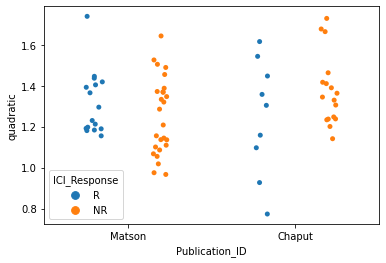

In [14]:
sns.stripplot(
    data=response_ad,
    x='Publication_ID',
    y='quadratic',
    hue='ICI_Response',
    dodge=True
)

### Pandas has extremely powerful methods to convert from wide to long (and vice versa)

In [15]:
# Melt converts to long
response_ad_long = response_ad.melt(
    id_vars=[
        'Publication_ID',
        'Sample_ID',
        'ICI_Response',
    ],
    value_vars=[
        'phylo_entropy',
        'quadratic',
        'unrooted_pd',
        'rooted_pd',
        'bwpd',
        'rooted_qd_1.00001',
        'rooted_qd_2'
    ]
)
response_ad_long.head()

,Publication_ID,Sample_ID,ICI_Response,variable,value
0,Matson,SRR6000888,R,phylo_entropy,2.97914
1,Matson,SRR6000887,NR,phylo_entropy,2.43453
2,Matson,SRR6000897,NR,phylo_entropy,3.85681
3,Matson,SRR6000883,NR,phylo_entropy,3.60791
4,Matson,SRR6000882,NR,phylo_entropy,2.96983


### Seaborn works particularly well with data in long format and can quickly plot all the permutations

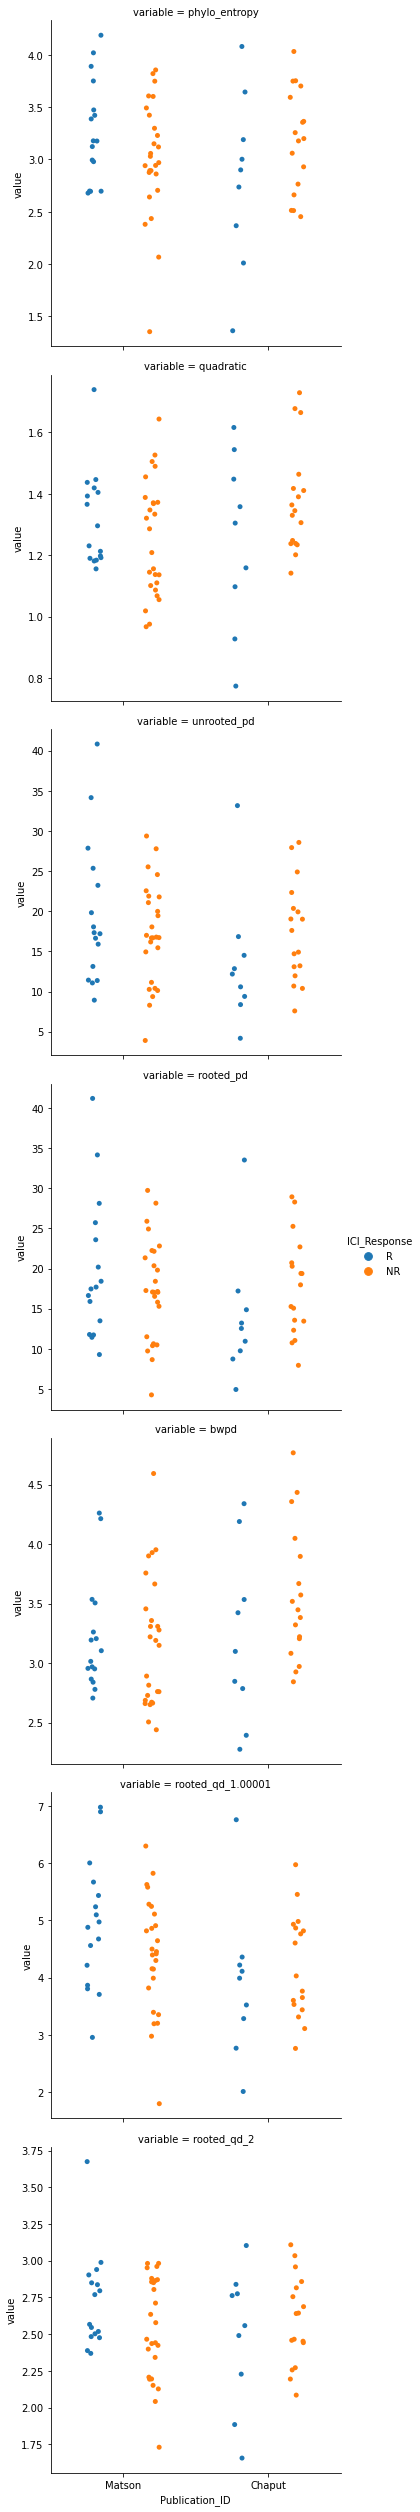

In [16]:
sns.catplot(
    data=response_ad_long,
    x='Publication_ID',
    y='value',
    hue='ICI_Response',
    dodge=True,
    kind='strip',
    row='variable',
    sharey=False
)

### Python also has very good (if a bit less cutting edge than R) statistical and machine learning libraries.
- statsmodels has a formula syntax borrowed from R

In [17]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

In [18]:
response_ad_long['ICI_Response_TF'] = response_ad_long.ICI_Response.apply(lambda v: 1 if v=='R' else 0)
response_ad_long.head()

,Publication_ID,Sample_ID,ICI_Response,variable,value,ICI_Response_TF
0,Matson,SRR6000888,R,phylo_entropy,2.97914,1
1,Matson,SRR6000887,NR,phylo_entropy,2.43453,0
2,Matson,SRR6000897,NR,phylo_entropy,3.85681,0
3,Matson,SRR6000883,NR,phylo_entropy,3.60791,0
4,Matson,SRR6000882,NR,phylo_entropy,2.96983,0


In [19]:
logit_model = smf.logit(
    "ICI_Response_TF ~ value",
    data=response_ad_long[
        (response_ad_long.Publication_ID == 'Chaput') &
        (response_ad_long.variable == 'rooted_qd_1.00001')
    ]
).fit()

logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.633822
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        ICI_Response_TF   No. Observations:                   26
Model:                          Logit   Df Residuals:                       24
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Aug 2020   Pseudo R-squ.:                 0.01738
Time:                        07:46:48   Log-Likelihood:                -16.479
converged:                       True   LL-Null:                       -16.771
Covariance Type:            nonrobust   LLR p-value:                    0.4451
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6412      1.744      0.368      0.713      -2.776       4.059
value         -0.3157      0.424     -0.744      0.457      -1.147       0.516
==============================================================================
"""

In [20]:
logit_model = smf.logit(
    "ICI_Response_TF ~ value",
    data=response_ad_long[
        (response_ad_long.Publication_ID == 'Chaput') &
        (response_ad_long.variable == 'bwpd')
    ]
).fit()

logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.605356
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        ICI_Response_TF   No. Observations:                   26
Model:                          Logit   Df Residuals:                       24
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Aug 2020   Pseudo R-squ.:                 0.06151
Time:                        07:46:48   Log-Likelihood:                -15.739
converged:                       True   LL-Null:                       -16.771
Covariance Type:            nonrobust   LLR p-value:                    0.1509
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8250      2.558      1.104      0.270      -2.189       7.839
value         -1.0228      0.758     -1.349      0.177      -2.509       0.464
==============================================================================
"""

In [21]:
from scipy.stats import ttest_ind

In [22]:
ttest_ind(
    a=response_ad_long[
        (response_ad_long.Publication_ID == 'Chaput') &
        (response_ad_long.variable == 'rooted_qd_1.00001') &
        (response_ad_long.ICI_Response == 'R')
    ].value,
    b=response_ad_long[
        (response_ad_long.Publication_ID == 'Chaput') &
        (response_ad_long.variable == 'rooted_qd_1.00001') &
        (response_ad_long.ICI_Response == 'NR')
    ].value
)

Ttest_indResult(statistic=-0.7316085898000334, pvalue=0.47149134131420956)

### for loops are easy to create in python

As an example, let's work on some tSNE plots, varying the perplexity

#### Pandas can read in whitespace delimited data files as well.
And, in fact, can read in arbitrarily delimited files, including with regular expressions
- pythex.org is a very useful site to test python-compatible regular expressions

In [23]:
distance = pd.read_csv('data/kr_distance.csv.gz', delimiter='\s+')
distance.head()

,sample_1,sample_2,Z_1,unit_tax_Z_1,inv_tax_Z_1
0,wgs__SRR6000949,wgs__SRR6000947,0.789809,2.83368,0.225979
1,wgs__SRR6000949,wgs__SRR6000946,1.065470,4.27888,0.364500
2,wgs__SRR6000949,wgs__SRR6000944,0.905309,3.79864,0.359135
3,wgs__SRR6000949,wgs__SRR6000943,1.494210,5.85040,0.532006
4,wgs__SRR6000949,wgs__SRR6000942,1.423440,5.47316,0.508411


##### This pairwise distance data is in long format. We need it into a distance matrix to run tSNE. 
First step is to clean up the sample names


In [24]:
distance['sample_1'] = distance.sample_1.apply(lambda s: s.split('__')[1])
distance['sample_2'] = distance.sample_2.apply(lambda s: s.split('__')[1])
distance.head()


,sample_1,sample_2,Z_1,unit_tax_Z_1,inv_tax_Z_1
0,SRR6000949,SRR6000947,0.789809,2.83368,0.225979
1,SRR6000949,SRR6000946,1.065470,4.27888,0.364500
2,SRR6000949,SRR6000944,0.905309,3.79864,0.359135
3,SRR6000949,SRR6000943,1.494210,5.85040,0.532006
4,SRR6000949,SRR6000942,1.423440,5.47316,0.508411


Let's convert from long to wide format (i.e. a matrix) and see what the issue is


In [25]:
distance.pivot(
    index='sample_1',
    columns='sample_2',
    values='Z_1'
)

sample_2,ERR2213660,ERR2213661,ERR2213662,ERR2213664,ERR2213665,ERR2213666,ERR2213668,ERR2213669,ERR2213670,ERR2213671,...,SRR6000937,SRR6000938,SRR6000939,SRR6000941,SRR6000942,SRR6000943,SRR6000944,SRR6000946,SRR6000947,SRR6000948
sample_1,,,,,,,,,,,,,,,,,,,,,
ERR2213660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.32085,1.59989,1.66444,1.09514,NaN,NaN,NaN,NaN,NaN,1.83951
ERR2213661,0.486953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.29963,1.66830,1.69018,1.18227,NaN,NaN,NaN,NaN,NaN,1.84154
ERR2213662,0.548831,0.522689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.12501,1.49692,1.41874,1.08449,NaN,NaN,NaN,NaN,NaN,1.58488
ERR2213664,1.334530,1.302760,1.132210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.14566,1.58071,1.54082,1.49692,NaN,NaN,NaN,NaN,NaN,1.62503
ERR2213665,1.505220,1.744790,1.459870,1.64348,NaN,NaN,NaN,NaN,NaN,NaN,...,1.68118,1.31029,1.37075,1.53813,NaN,NaN,NaN,NaN,NaN,1.45827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR6000944,0.946156,0.903185,0.990397,1.73466,1.82551,0.920229,1.148420,1.44540,0.961573,1.086690,...,1.40790,1.67260,1.65346,1.22469,1.14886,1.47594,NaN,NaN,NaN,1.78076
SRR6000946,0.917878,0.927294,0.998259,1.32427,1.91523,1.033770,1.088430,1.66105,1.153230,1.079130,...,1.46043,1.70953,1.75242,1.16576,1.58920,1.66868,1.128770,NaN,NaN,1.86690
SRR6000947,0.921134,0.954903,0.751172,1.51614,1.47730,0.817039,0.873793,1.18746,1.002040,0.702643,...,1.28955,1.52723,1.49865,1.10213,1.58229,1.32211,1.027680,1.14510,NaN,1.50010


When A -> B exists, B -> A does not. To fill in the matrix we need to include both

In [26]:
distance_full = pd.concat([
    distance,
    distance.rename({'sample_1': 'sample_2', 'sample_2': 'sample_1'}, axis=1)
]).drop_duplicates()
distance_full.tail()

,sample_1,sample_2,Z_1,unit_tax_Z_1,inv_tax_Z_1
103280,SRR2940912,SRR2940914,1.098710,4.23255,0.377396
103281,SRR2940911,SRR2940914,0.767321,2.91430,0.249968
103282,SRR2940912,SRR2940913,1.735470,5.07238,0.512887
103283,SRR2940911,SRR2940913,1.495510,4.45899,0.448165
103284,SRR2940911,SRR2940912,1.087490,3.85116,0.304186


#### pivot is a fast and power pandas function to convert from long-formatted data to wide

In [27]:
distance_mat = distance_full.pivot(
    index='sample_1',
    columns='sample_2',
    values='Z_1'
)
distance_mat

sample_2,ERR2213660,ERR2213661,ERR2213662,ERR2213664,ERR2213665,ERR2213666,ERR2213668,ERR2213669,ERR2213670,ERR2213671,...,SRR6000938,SRR6000939,SRR6000941,SRR6000942,SRR6000943,SRR6000944,SRR6000946,SRR6000947,SRR6000948,SRR6000949
sample_1,,,,,,,,,,,,,,,,,,,,,
ERR2213660,NaN,0.486953,0.548831,1.33453,1.50522,0.669113,0.816424,1.219760,0.694386,0.678244,...,1.59989,1.66444,1.09514,1.31687,1.31749,0.946156,0.917878,0.921134,1.83951,0.981527
ERR2213661,0.486953,NaN,0.522689,1.30276,1.74479,0.774207,0.939362,1.399830,0.916139,0.662176,...,1.66830,1.69018,1.18227,1.17848,1.38759,0.903185,0.927294,0.954903,1.84154,0.832912
ERR2213662,0.548831,0.522689,NaN,1.13221,1.45987,0.653719,0.757618,1.193140,0.895867,0.590189,...,1.49692,1.41874,1.08449,1.37505,1.29689,0.990397,0.998259,0.751172,1.58488,0.877248
ERR2213664,1.334530,1.302760,1.132210,NaN,1.64348,1.430940,1.332070,1.595750,1.440650,1.353890,...,1.58071,1.54082,1.49692,1.77473,1.85132,1.734660,1.324270,1.516140,1.62503,1.597390
ERR2213665,1.505220,1.744790,1.459870,1.64348,NaN,1.323250,1.296960,0.768458,1.250180,1.649970,...,1.31029,1.37075,1.53813,2.31225,1.10122,1.825510,1.915230,1.477300,1.45827,1.752700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR6000944,0.946156,0.903185,0.990397,1.73466,1.82551,0.920229,1.148420,1.445400,0.961573,1.086690,...,1.67260,1.65346,1.22469,1.14886,1.47594,NaN,1.128770,1.027680,1.78076,0.905309
SRR6000946,0.917878,0.927294,0.998259,1.32427,1.91523,1.033770,1.088430,1.661050,1.153230,1.079130,...,1.70953,1.75242,1.16576,1.58920,1.66868,1.128770,NaN,1.145100,1.86690,1.065470
SRR6000947,0.921134,0.954903,0.751172,1.51614,1.47730,0.817039,0.873793,1.187460,1.002040,0.702643,...,1.52723,1.49865,1.10213,1.58229,1.32211,1.027680,1.145100,NaN,1.50010,0.789809


##### Now let's make sure the index (row labels) is in the same order as the columns
.loc[] is a way of accessing and reordering the index (row labels)

In [28]:
distance_mat = distance_mat.loc[
    distance_mat.columns
]
distance_mat

sample_2,ERR2213660,ERR2213661,ERR2213662,ERR2213664,ERR2213665,ERR2213666,ERR2213668,ERR2213669,ERR2213670,ERR2213671,...,SRR6000938,SRR6000939,SRR6000941,SRR6000942,SRR6000943,SRR6000944,SRR6000946,SRR6000947,SRR6000948,SRR6000949
sample_2,,,,,,,,,,,,,,,,,,,,,
ERR2213660,NaN,0.486953,0.548831,1.33453,1.50522,0.669113,0.816424,1.219760,0.694386,0.678244,...,1.59989,1.66444,1.09514,1.31687,1.31749,0.946156,0.917878,0.921134,1.83951,0.981527
ERR2213661,0.486953,NaN,0.522689,1.30276,1.74479,0.774207,0.939362,1.399830,0.916139,0.662176,...,1.66830,1.69018,1.18227,1.17848,1.38759,0.903185,0.927294,0.954903,1.84154,0.832912
ERR2213662,0.548831,0.522689,NaN,1.13221,1.45987,0.653719,0.757618,1.193140,0.895867,0.590189,...,1.49692,1.41874,1.08449,1.37505,1.29689,0.990397,0.998259,0.751172,1.58488,0.877248
ERR2213664,1.334530,1.302760,1.132210,NaN,1.64348,1.430940,1.332070,1.595750,1.440650,1.353890,...,1.58071,1.54082,1.49692,1.77473,1.85132,1.734660,1.324270,1.516140,1.62503,1.597390
ERR2213665,1.505220,1.744790,1.459870,1.64348,NaN,1.323250,1.296960,0.768458,1.250180,1.649970,...,1.31029,1.37075,1.53813,2.31225,1.10122,1.825510,1.915230,1.477300,1.45827,1.752700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR6000944,0.946156,0.903185,0.990397,1.73466,1.82551,0.920229,1.148420,1.445400,0.961573,1.086690,...,1.67260,1.65346,1.22469,1.14886,1.47594,NaN,1.128770,1.027680,1.78076,0.905309
SRR6000946,0.917878,0.927294,0.998259,1.32427,1.91523,1.033770,1.088430,1.661050,1.153230,1.079130,...,1.70953,1.75242,1.16576,1.58920,1.66868,1.128770,NaN,1.145100,1.86690,1.065470
SRR6000947,0.921134,0.954903,0.751172,1.51614,1.47730,0.817039,0.873793,1.187460,1.002040,0.702643,...,1.52723,1.49865,1.10213,1.58229,1.32211,1.027680,1.145100,NaN,1.50010,0.789809


In [29]:
# And fill in the NaN with zero (as they are A->A) distances
distance_mat.fillna(0, inplace=True)
distance_mat

sample_2,ERR2213660,ERR2213661,ERR2213662,ERR2213664,ERR2213665,ERR2213666,ERR2213668,ERR2213669,ERR2213670,ERR2213671,...,SRR6000938,SRR6000939,SRR6000941,SRR6000942,SRR6000943,SRR6000944,SRR6000946,SRR6000947,SRR6000948,SRR6000949
sample_2,,,,,,,,,,,,,,,,,,,,,
ERR2213660,0.000000,0.486953,0.548831,1.33453,1.50522,0.669113,0.816424,1.219760,0.694386,0.678244,...,1.59989,1.66444,1.09514,1.31687,1.31749,0.946156,0.917878,0.921134,1.83951,0.981527
ERR2213661,0.486953,0.000000,0.522689,1.30276,1.74479,0.774207,0.939362,1.399830,0.916139,0.662176,...,1.66830,1.69018,1.18227,1.17848,1.38759,0.903185,0.927294,0.954903,1.84154,0.832912
ERR2213662,0.548831,0.522689,0.000000,1.13221,1.45987,0.653719,0.757618,1.193140,0.895867,0.590189,...,1.49692,1.41874,1.08449,1.37505,1.29689,0.990397,0.998259,0.751172,1.58488,0.877248
ERR2213664,1.334530,1.302760,1.132210,0.00000,1.64348,1.430940,1.332070,1.595750,1.440650,1.353890,...,1.58071,1.54082,1.49692,1.77473,1.85132,1.734660,1.324270,1.516140,1.62503,1.597390
ERR2213665,1.505220,1.744790,1.459870,1.64348,0.00000,1.323250,1.296960,0.768458,1.250180,1.649970,...,1.31029,1.37075,1.53813,2.31225,1.10122,1.825510,1.915230,1.477300,1.45827,1.752700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR6000944,0.946156,0.903185,0.990397,1.73466,1.82551,0.920229,1.148420,1.445400,0.961573,1.086690,...,1.67260,1.65346,1.22469,1.14886,1.47594,0.000000,1.128770,1.027680,1.78076,0.905309
SRR6000946,0.917878,0.927294,0.998259,1.32427,1.91523,1.033770,1.088430,1.661050,1.153230,1.079130,...,1.70953,1.75242,1.16576,1.58920,1.66868,1.128770,0.000000,1.145100,1.86690,1.065470
SRR6000947,0.921134,0.954903,0.751172,1.51614,1.47730,0.817039,0.873793,1.187460,1.002040,0.702643,...,1.52723,1.49865,1.10213,1.58229,1.32211,1.027680,1.145100,0.000000,1.50010,0.789809


##### Now we can load the TSNE module for python and use it to calculate the ordination while varying the perplexity.


In [30]:
from sklearn.manifold import TSNE

##### list and dictionary comprehension are powerful techniques in vanilla python for handling lists of items
This is a way of converting each item in a list in a quick and parallel manner. The general format is:
```
[
    do_something
    for item in list
]
```
As in:
```
[
    name.lower()
    for name in
    class_roster
]
```

In [31]:
# Make a dictionary where the key is a perplexity and the value is a dataframe of the TSNE coordinates for each sample
tsne_perplexity = {
    perplexity: pd.DataFrame(
        TSNE(
            metric='precomputed',
            perplexity=perplexity
        ).fit_transform(distance_mat),
        index=distance_mat.index
    )
    for perplexity in range(15, 41,5)
}
tsne_perplexity[15]

,0,1
sample_2,,
ERR2213660,-12.573725,13.747034
ERR2213661,-15.248500,14.626090
ERR2213662,-3.808824,3.242126
ERR2213664,18.756884,-9.432217
ERR2213665,17.521534,9.204677
...,...,...
SRR6000944,-29.748484,19.440628
SRR6000946,-13.302332,-15.247581
SRR6000947,7.764101,4.072323


##### Use the dictionary we created to make a plot for each perplexity value

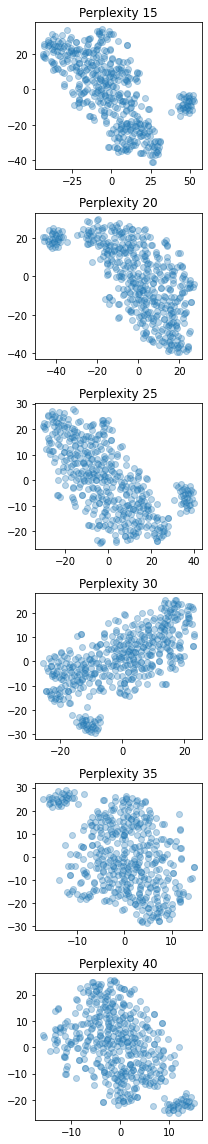

In [32]:
fig, axes = plt.subplots(nrows=6)
fig.set_figheight(16)
fig.set_figwidth(3)
ax_i = 0
for perplexity, tsne_result in tsne_perplexity.items():
    ax = axes[ax_i]
    ax.scatter(
        tsne_result[0],
        tsne_result[1],
        alpha=0.3
    )
    ax.set_title(
        "Perplexity {}".format(perplexity)
    )
    ax_i += 1
plt.tight_layout()
plt.show()
    

##### Use slicing to color specimens by publication

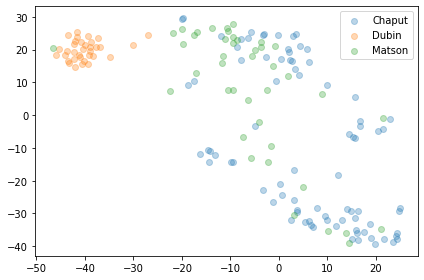

In [33]:
fig, ax = plt.subplots()
tsne_result = tsne_perplexity[20]
for publication, p_metadata in metadata.groupby('Publication_ID'):
    tsne_publication = tsne_result[
        tsne_result.index.map(lambda sp: sp in set(p_metadata.Sample_ID))
    ]
    ax.scatter(
        x=tsne_publication[0],
        y=tsne_publication[1],
        label=publication,
        alpha=0.3
    )
ax.legend()
plt.tight_layout()
plt.show()

    